In [286]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix 

import numpy as np
import os
import pandas as pd

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8.27)})


PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import and Examine Data

In [287]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Attribute Information
1. Age: age of the patient years
2. Sex: sex of the patient M: Male, F: Female
3. ChestPainType: chest pain type TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic
4. RestingBP: resting blood pressure mm Hg
5. Cholesterol: serum cholesterol mm/dl
6. FastingBS: fasting blood sugar 1: if FastingBS > 120 mg/dl, 0: otherwise
7. RestingECG: resting electrocardiogram results Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. MaxHR: maximum heart rate achieved Numeric value between 60 and 202
9. ExerciseAngina: exercise-induced angina Y: Yes, N: No
10. Oldpeak: oldpeak = ST Numeric value measured in depression
11. ST_Slope: the slope of the peak exercise ST segment Up: upsloping, Flat: flat, Down: downsloping
12. HeartDisease: output class 1: heart disease, 0: Normal

In [288]:
df.shape

(918, 12)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [290]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Visualise Data

In [291]:
#split Data into numerical and categorical data

cat_col = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']
num_col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

label = 'HeartDisease'


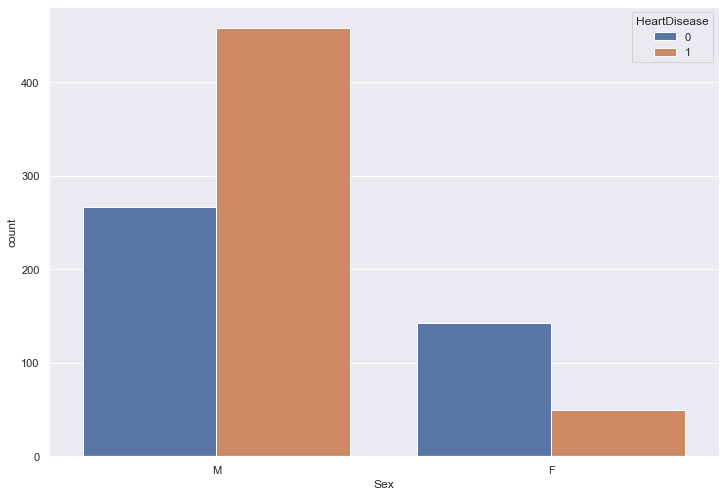

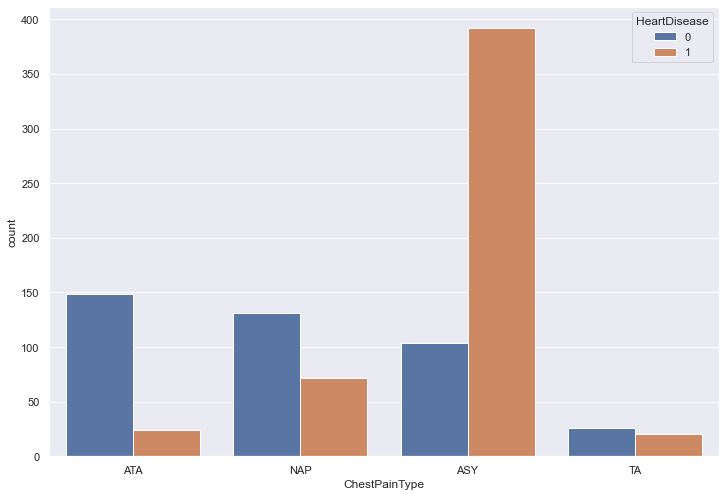

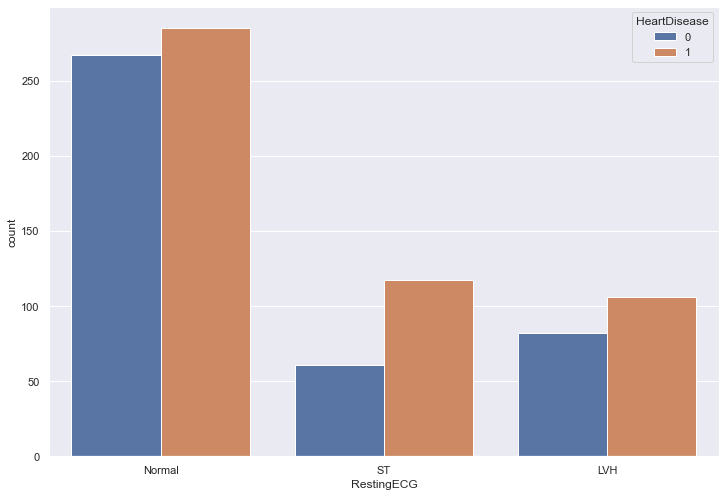

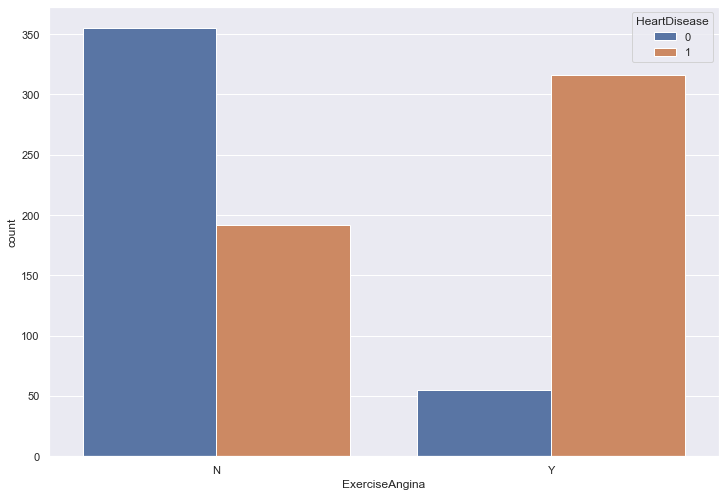

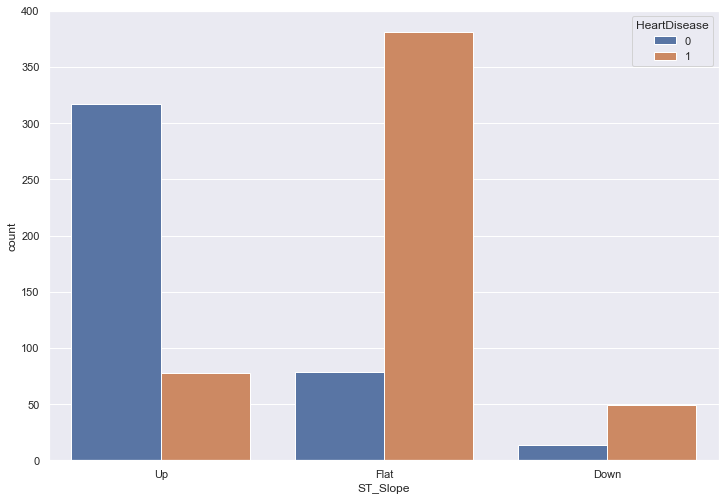

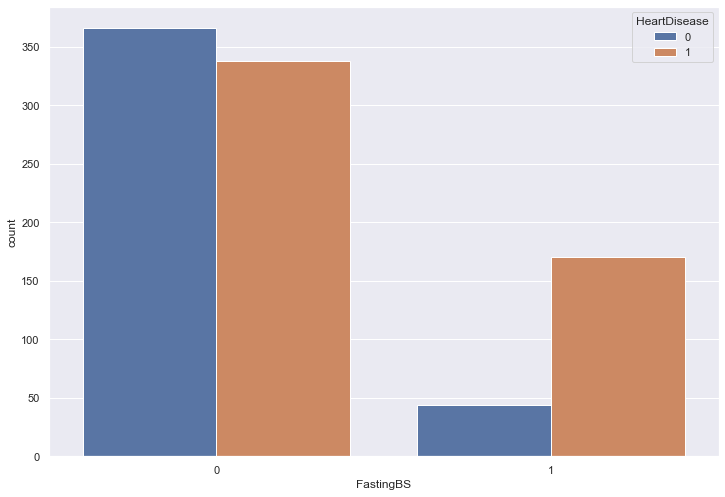

In [292]:
#create count plots for categorical data
for col in cat_col: 
    sns.countplot(x=df[col], hue= df['HeartDisease'])
    plt.show()

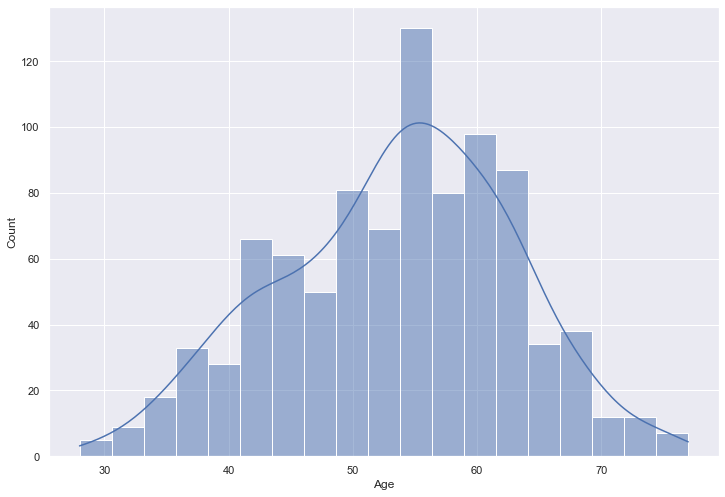

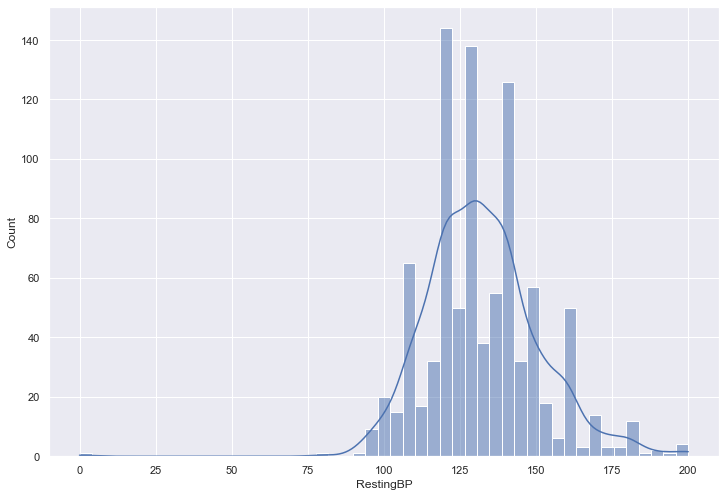

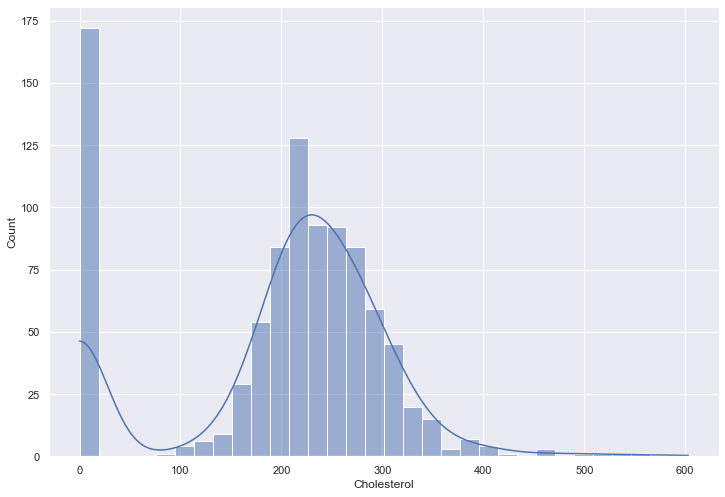

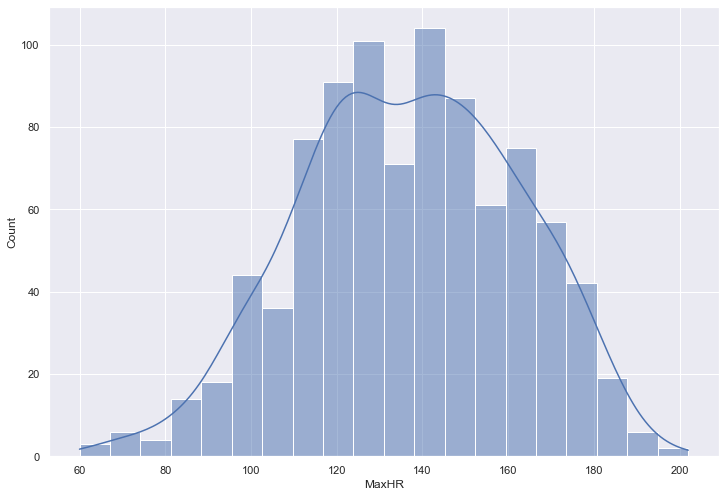

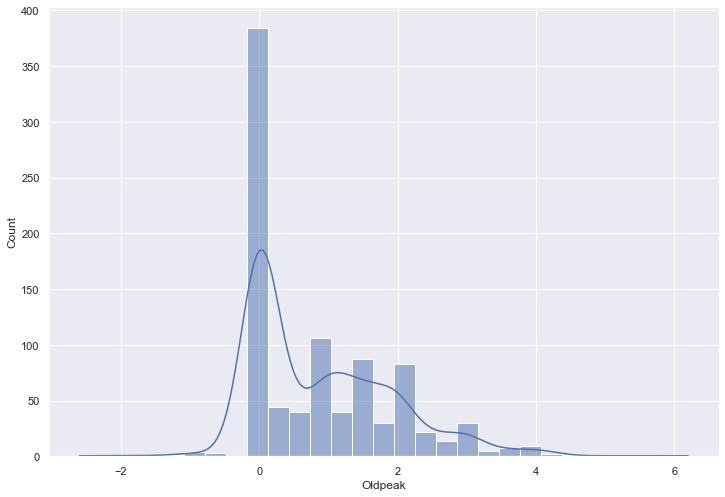

In [293]:
#create histograms for numerical columns 
for col in num_col:
    sns.histplot(x = col , data = df, kde = True)
    plt.show()

## Findings For Each Variable

1. **Sex -** Men appear to be twice as likely to get heart disease than women
2. **Ches Pain Type -** Having ASY type chest pain increases the chance of having heart disease
3. **Resting ECG -** ST have a slightly higher chance of heart disease
4. **Exercise Enigma -** If the person had has a exercise enigma they are more likely to have heart disease
5. **ST_slope -** Having a flat ST slope could be a indication of heart disease
6. **Fasting Blood sugar -** Those with high FBS are more likely to have heart disease 
7. **Age -** People who are older have a higher risk of heart disease especially from the age of 55
8. **Resting BP -** Those with a reasting blood pressure of over 115 have a higher chance of heart disease
9. **Choleserol -** There does seem to be a peak at around 200 however we must take into account the outlier of 0 where it is likely to be a filler result. 
10. **Max Heart Rate -** This looks to almos follow the normal distribution
11. **Old Peak -** Again we need to consider the outlier at 0 however the higher values appear to have a increasd chance of heart disease 

# Outliers, Encoding and Scaling


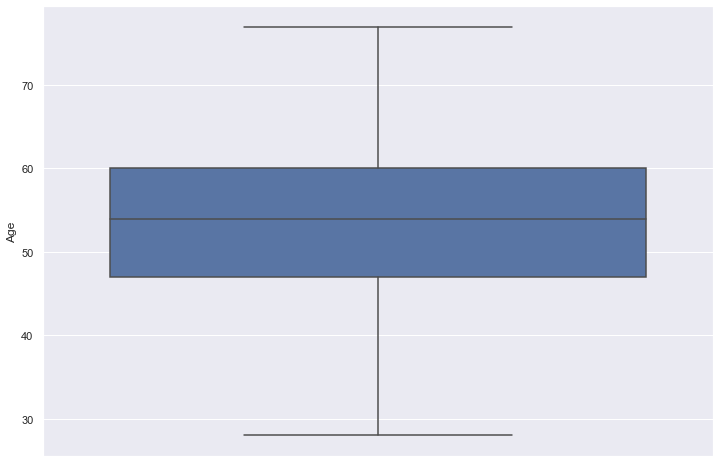

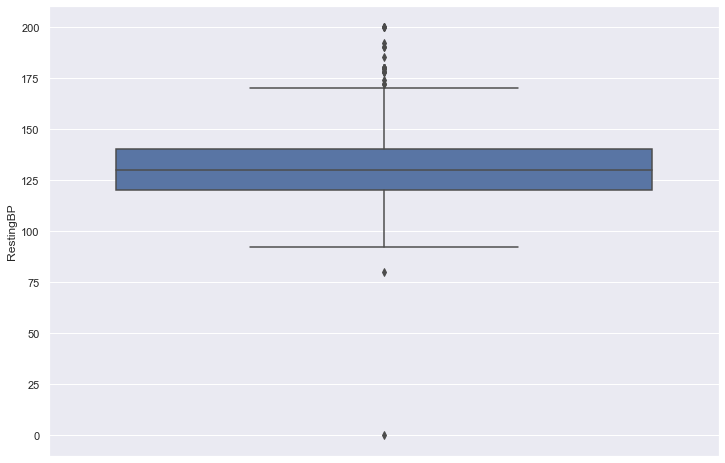

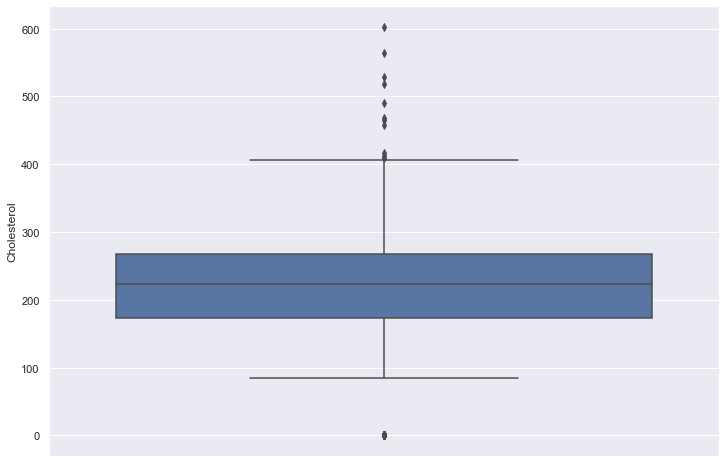

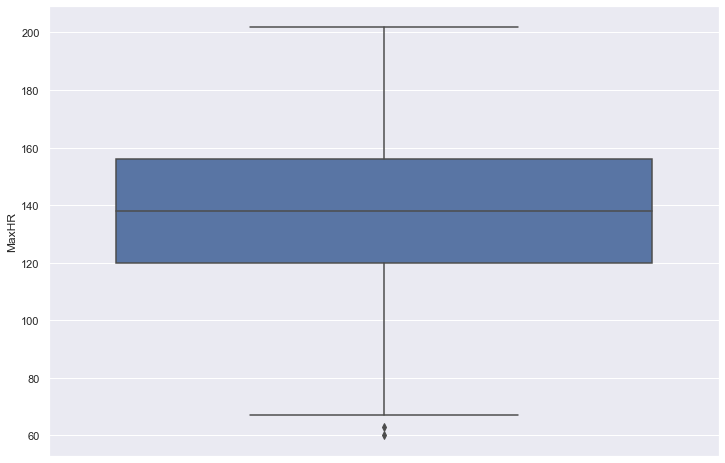

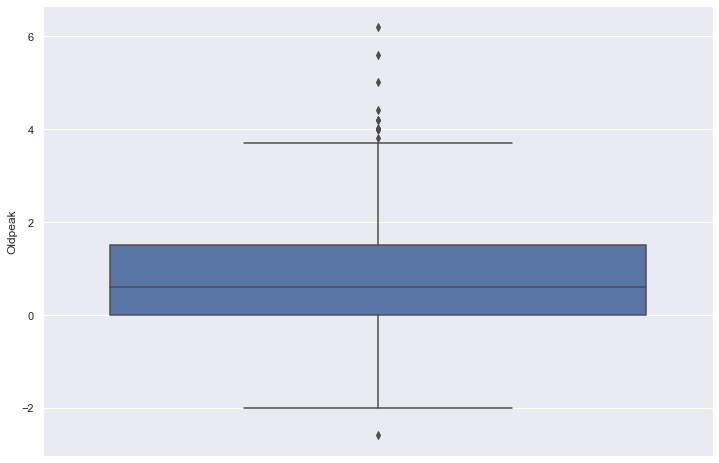

In [294]:
#plot boxplot for outlier detection
for col in num_col:
    sns.boxplot(y= col , data = df)
    plt.show()

In [295]:
#import scalers and test train splits
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [296]:
#encode data
label_encoder = preprocessing.LabelEncoder()

In [297]:
#encode data
df["Sex"]= label_encoder.fit_transform(df["Sex"])
df["Sex"].unique()
df["ChestPainType"]= label_encoder.fit_transform(df["ChestPainType"])
df["ChestPainType"].unique()
df["RestingECG"]= label_encoder.fit_transform(df["RestingECG"])
df["RestingECG"].unique()
df["ExerciseAngina"]= label_encoder.fit_transform(df["ExerciseAngina"])
df["ExerciseAngina"].unique()
df["ST_Slope"]= label_encoder.fit_transform(df["ST_Slope"])
df["ST_Slope"].unique()
    

array([2, 1, 0])

In [298]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [299]:
#replace 0 value for resting bp
df_bp = df.groupby(["Age","Sex"]).agg({"RestingBP":"mean"}).reset_index().rename(columns={"RestingBP": "BP_mean"})

df_bpclean = pd.merge(df,df_bp,on=["Age","Sex"])
df_bpclean["RestingBP"] = np.where(df_bpclean["RestingBP"]==0, df_bpclean["BP_mean"], df_bpclean["RestingBP"])


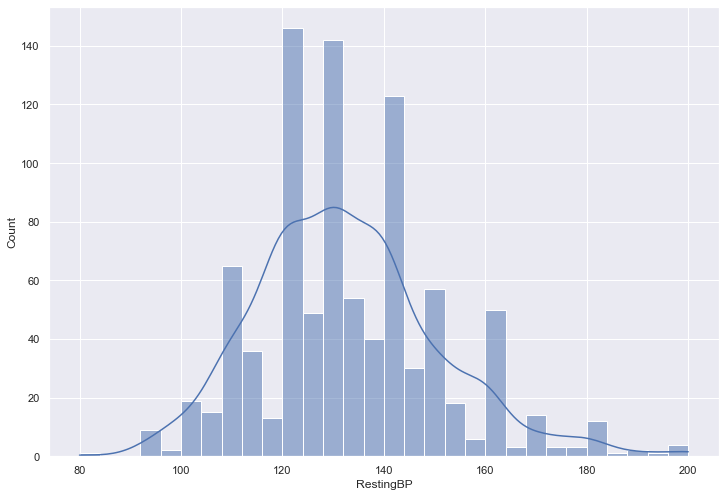

In [300]:
sns.histplot(x = df_bpclean["RestingBP"] , data = df, kde = True)
plt.show()

In [301]:
#replace 0 values in cholesterol
df_col = df_bpclean.groupby(["Age","Sex"]).agg({"Cholesterol":"mean"}).reset_index().rename(columns={"Cholesterol": "Chol_mean"})

df_cholclean = pd.merge(df_bpclean,df_col,on=["Age","Sex"])



df_cholclean.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,BP_mean,Chol_mean
0,40,1,1,140.0,289,0,1,172,0,0.0,2,0,126.5,215.833333
1,40,1,2,130.0,215,0,1,138,0,0.0,2,0,126.5,215.833333
2,40,1,0,120.0,466,1,1,152,1,1.0,1,1,126.5,215.833333
3,40,1,1,130.0,275,0,1,150,0,0.0,2,0,126.5,215.833333
4,40,1,2,140.0,235,0,1,188,0,0.0,2,0,126.5,215.833333


In [302]:
df_cholclean["Cholesterol"] = np.where(df_cholclean["Cholesterol"]==0, df_cholclean["Chol_mean"], df_cholclean["Cholesterol"])


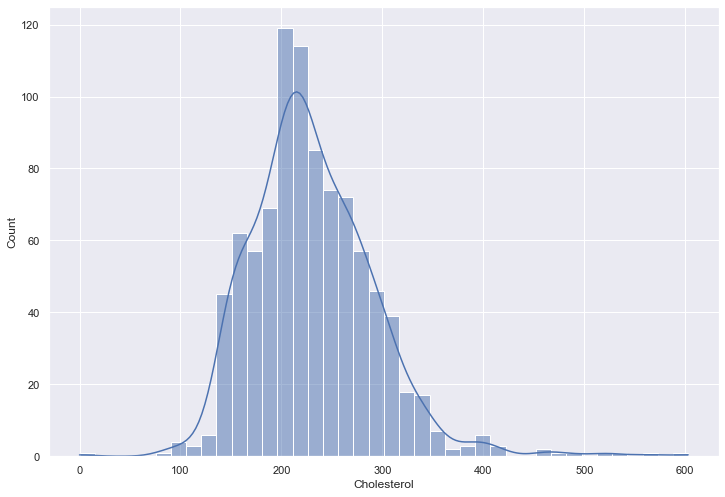

In [303]:
sns.histplot(x = df_cholclean['Cholesterol'] , data = df, kde = True)
plt.show()

In [304]:
df_cholclean.drop('Chol_mean', axis=1, inplace=True)
df_cholclean.drop('BP_mean', axis=1, inplace=True)
df_cholclean.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0,1,172,0,0.0,2,0
1,40,1,2,130.0,215.0,0,1,138,0,0.0,2,0
2,40,1,0,120.0,466.0,1,1,152,1,1.0,1,1
3,40,1,1,130.0,275.0,0,1,150,0,0.0,2,0
4,40,1,2,140.0,235.0,0,1,188,0,0.0,2,0


In [305]:
#scale data
scaler = RobustScaler()
scaler.fit(df_cholclean.drop('HeartDisease',axis = 1))

RobustScaler()

In [306]:
scaled_feat = scaler.transform(df_cholclean.drop('HeartDisease',axis = 1))
df_clean = pd.DataFrame(scaled_feat,columns = df_cholclean.columns[:-1])
df_clean.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.076923,0.0,0.5,0.5,0.880000,0.0,0.0,0.944444,0.0,-0.400000,1.0
1,-1.076923,0.0,1.0,0.0,-0.106667,0.0,0.0,0.000000,0.0,-0.400000,1.0
2,-1.076923,0.0,0.0,-0.5,3.240000,1.0,0.0,0.388889,1.0,0.266667,0.0
3,-1.076923,0.0,0.5,0.0,0.693333,0.0,0.0,0.333333,0.0,-0.400000,1.0
4,-1.076923,0.0,1.0,0.5,0.160000,0.0,0.0,1.388889,0.0,-0.400000,1.0


# Strart Training Model

In [307]:
#split into test and train
X = df_clean
y = df_cholclean['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)


In [308]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [309]:
#import tensorflow and sklearn packages 
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, ReLU, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import BinaryAccuracy 
from tensorflow.keras.metrics import FalseNegatives
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import EarlyStopping
from numpy import sqrt
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import time 

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


### Comparison Models

In [310]:
#fit SVC model
svcreg =SVC()
svcmodel = svcreg.fit(X_train,y_train)
svcscore = svcreg.score(X_train, y_train)

print("Decision SVC score: ", svcscore)

Decision SVC score:  0.9064245810055865


In [311]:
#fit random forest model
randf =RandomForestClassifier(n_estimators=10)
randfmodel = randf.fit(X_train,y_train)
randfscore = randf.score(X_train, y_train)
print("Random Forest Model score: ", randfscore)

Random Forest Model score:  0.9860335195530726


In [312]:
#fit K nearest neighbour model
nnreg = KNeighborsClassifier()
nnmodel = nnreg.fit(X_train,y_train)
nnscore = nnreg.score(X_train, y_train)
print("Nearest Neighbor Model socre: ", nnscore)

Nearest Neighbor Model socre:  0.888268156424581


In [313]:
#fit gradient boosting classifier model 
gdc = GradientBoostingClassifier()
gdcmodel = gdc.fit(X_train,y_train)
gdcscore = gdc.score(X_train, y_train)
print("Gradient Boosting Model score: ", gdcscore)

Gradient Boosting Model score:  0.9553072625698324


In [314]:
#evalute models through accuracy, precision and recall
from sklearn.model_selection import cross_val_predict

svcregy_train_pred = cross_val_predict(svcreg, X_train, y_train, cv=3)
nnregy_train_pred = cross_val_predict(nnreg, X_train, y_train, cv=3)
randregy_train_pred = cross_val_predict(randf, X_train, y_train, cv=3)
gdcy_train_pred = cross_val_predict(gdc, X_train, y_train, cv=3)

svcacc = accuracy_score(y_train, svcregy_train_pred)
nnacc = accuracy_score(y_train, nnregy_train_pred)
randacc = accuracy_score(y_train, randregy_train_pred)
gdcacc = accuracy_score(y_train, gdcy_train_pred)

svcpres = precision_score(y_train, svcregy_train_pred)
nnpres = precision_score(y_train, nnregy_train_pred)
randpres = precision_score(y_train, randregy_train_pred)
gdcpres = precision_score(y_train, gdcy_train_pred)

svcrecall = recall_score(y_train, svcregy_train_pred)
nnrecall = recall_score(y_train, nnregy_train_pred)
randrecall = recall_score(y_train, randregy_train_pred)
gdcrecall = recall_score(y_train, gdcy_train_pred)


print("SVC precision:",svcpres)
print("SVC recall:",svcrecall)
print("SVC accuracy:",svcacc)

print("Nearest Neighbor precision:",nnpres)
print("Nearest Neighbor recall:",nnrecall)
print("Nearest Neighbor accuracy:",nnacc)

print("Random Forest precision:",randpres)
print("Random Forest recall:",randrecall)
print("Random Forest accuracy:",randacc)

print("GDC precision:",gdcpres)
print("GDC recall:",gdcrecall)
print("GDC recall:",gdcacc)


SVC precision: 0.8658536585365854
SVC recall: 0.8964646464646465
SVC accuracy: 0.8659217877094972
Nearest Neighbor precision: 0.8695652173913043
Nearest Neighbor recall: 0.8585858585858586
Nearest Neighbor accuracy: 0.8505586592178771
Random Forest precision: 0.8798955613577023
Random Forest recall: 0.851010101010101
Random Forest accuracy: 0.8533519553072626
GDC precision: 0.8771498771498771
GDC recall: 0.9015151515151515
GDC recall: 0.8756983240223464


In [315]:
#run hyperperamater tuning for GBC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
n_estimators = range(50, 200, 50)
max_depth = range(1, 5, 1)
learning_rate = [0.001, 0.01, 0.1]

random_grid_gbc = {'n_estimators': n_estimators,
                  'max_depth': max_depth,
                  'learning_rate': learning_rate}

In [316]:
gbc = GradientBoostingClassifier()
gbc_random = RandomizedSearchCV(estimator=gbc, param_distributions=random_grid_gbc, 
                                n_iter=20, cv=3, scoring='accuracy')
t1 = time.time()
gbc_random.fit(X_train, y_train)
t2 = time.time()
print(t2-t1)

print(gbc_random.best_params_)

10.025654315948486
{'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.1}


In [317]:
gbc_tuned = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
                                       max_depth=2, random_state=42)

gbctuney_train_pred = cross_val_predict(gbc_tuned, X_train, y_train, cv=3)

gbctuneacc = accuracy_score(y_train, gbctuney_train_pred)
gbctunepres = precision_score(y_train, gbctuney_train_pred)
gcftunerecall = recall_score(y_train, gbctuney_train_pred)


print("trained GBC accuracy:",gbctuneacc)
print("trained GBC precison:",gbctunepres)
print("trained GBC recall:",gcftunerecall)


trained GBC accuracy: 0.8798882681564246
trained GBC precison: 0.8780487804878049
trained GBC recall: 0.9090909090909091


In [275]:
#check model with test data
gbctuney_test_pred = cross_val_predict(gbc_tuned, X_test, y_test, cv=3)
tgbctuneacc = accuracy_score(y_test, gbctuney_test_pred)
tgbctunepres = precision_score(y_test, gbctuney_test_pred)
tgbctunerecall = recall_score(y_test, gbctuney_test_pred)

print("trained GBC accuracy:",tgbctuneacc)
print("trained GBC precison:",tgbctunepres)
print("trained GBC recall:",tgbctunerecall)


trained GBC accuracy: 0.7623762376237624
trained GBC precison: 0.7857142857142857
trained GBC recall: 0.7857142857142857


### Neural Network

In [276]:
#Build Neural network using accuracy 
model = Sequential([
    Dense(units= 40, input_shape=(11,), activation='relu'),
    Dense(units=40, activation='relu'),
    Dense(units= 40, activation= 'relu'),
    Dense(units= 1, activation='sigmoid')
])

model.summary()
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='categorical_hinge', metrics=['accuracy'])
es = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 40)                480       
                                                                 
 dense_33 (Dense)            (None, 40)                1640      
                                                                 
 dense_34 (Dense)            (None, 40)                1640      
                                                                 
 dense_35 (Dense)            (None, 1)                 41        
                                                                 
Total params: 3,801
Trainable params: 3,801
Non-trainable params: 0
_________________________________________________________________


In [277]:
#fit model 1 to train data
model.fit(X_train, y_train, epochs=2000,callbacks=[es])

Epoch 1/2000
23/23 [==============================] - 1s 3ms/step - loss: 0.7225 - accuracy: 0.7654
Epoch 2/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.6071 - accuracy: 0.8422
Epoch 3/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.5913 - accuracy: 0.8534
Epoch 4/2000
23/23 [==============================] - 0s 4ms/step - loss: 0.5882 - accuracy: 0.8617
Epoch 5/2000
23/23 [==============================] - 0s 4ms/step - loss: 0.5813 - accuracy: 0.8687
Epoch 6/2000
23/23 [==============================] - 0s 4ms/step - loss: 0.5878 - accuracy: 0.8575
Epoch 7/2000
23/23 [==============================] - 0s 4ms/step - loss: 0.5987 - accuracy: 0.8492
Epoch 8/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.5781 - accuracy: 0.8701
Epoch 9/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.8771
Epoch 10/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.8687

In [278]:
predicted = (model.predict(X_train) >= 0.5)

confmatrix = confusion_matrix(y_train, predicted)
acc = accuracy_score(y_train, predicted)
rec = recall_score(y_train, predicted)
pre = precision_score(y_train, predicted)

print('Model Confusion Matrix:', confmatrix)
print('Model Accuracy:', acc)
print('Model Recall:', rec)
print('Model Precision:', pre)

Model Confusion Matrix: [[280  40]
 [ 29 367]]
Model Accuracy: 0.9036312849162011
Model Recall: 0.9267676767676768
Model Precision: 0.9017199017199017


In [279]:
#run check with test data
predicted = (model.predict(X_test) >= 0.5)

confmatrix = confusion_matrix(y_test, predicted)
acc = accuracy_score(y_test, predicted)
rec = recall_score(y_test, predicted)
pre = precision_score(y_test, predicted)

print('Model Confusion Matrix:', confmatrix)
print('Model Accuracy:', acc)
print('Model Recall:', rec)
print('Model Precision:', pre)

Model Confusion Matrix: [[71 19]
 [14 98]]
Model Accuracy: 0.8366336633663366
Model Recall: 0.875
Model Precision: 0.8376068376068376


In [280]:
#create model 2 using recall metric
model2 = Sequential([
    Dense(units= 40, input_shape=(11,), activation='relu'),
    Dense(units=40, activation='relu'),
    Dense(units=40, activation='relu'),
    Dense(units= 1, activation='sigmoid')
])

model2.summary()
model2.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='categorical_hinge', metrics=[Recall()])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 40)                480       
                                                                 
 dense_37 (Dense)            (None, 40)                1640      
                                                                 
 dense_38 (Dense)            (None, 40)                1640      
                                                                 
 dense_39 (Dense)            (None, 1)                 41        
                                                                 
Total params: 3,801
Trainable params: 3,801
Non-trainable params: 0
_________________________________________________________________


In [281]:
model2.fit(X_train, y_train, epochs=80)

Epoch 1/80
23/23 [==============================] - 1s 3ms/step - loss: 0.7322 - recall_4: 0.7500
Epoch 2/80
23/23 [==============================] - 0s 3ms/step - loss: 0.6004 - recall_4: 0.8611
Epoch 3/80
23/23 [==============================] - 0s 3ms/step - loss: 0.5883 - recall_4: 0.9217
Epoch 4/80
23/23 [==============================] - 0s 4ms/step - loss: 0.5739 - recall_4: 0.9066
Epoch 5/80
23/23 [==============================] - 0s 3ms/step - loss: 0.5800 - recall_4: 0.9318
Epoch 6/80
23/23 [==============================] - 0s 4ms/step - loss: 0.5834 - recall_4: 0.8611
Epoch 7/80
23/23 [==============================] - 0s 3ms/step - loss: 0.5716 - recall_4: 0.8939
Epoch 8/80
23/23 [==============================] - 0s 3ms/step - loss: 0.5802 - recall_4: 0.8687
Epoch 9/80
23/23 [==============================] - 0s 3ms/step - loss: 0.5775 - recall_4: 0.8939
Epoch 10/80
23/23 [==============================] - 0s 3ms/step - loss: 0.5677 - recall_4: 0.8939
Epoch 11/80
23/23 [

In [282]:
predicted = (model2.predict(X_train) >= 0.5)

confmatrix = confusion_matrix(y_train, predicted)
acc = accuracy_score(y_train, predicted)
rec = recall_score(y_train, predicted)
pre = precision_score(y_train, predicted)

print('Model Confusion Matrix:', confmatrix)
print('Model Accuracy:', acc)
print('Model Recall:', rec)
print('Model Precision:', pre)

Model Confusion Matrix: [[277  43]
 [ 19 377]]
Model Accuracy: 0.9134078212290503
Model Recall: 0.952020202020202
Model Precision: 0.8976190476190476


In [283]:
#check with test data
predicted = (model2.predict(X_test) >= 0.5)

confmatrix2 = confusion_matrix(y_test, predicted)
acc2 = accuracy_score(y_test, predicted)
rec2 = recall_score(y_test, predicted)
pre2 = precision_score(y_test, predicted)

print('Model Confusion Matrix:', confmatrix2)
print('Model Accuracy:', acc2)
print('Model Recall:', rec2)
print('Model Precision:', pre2)

Model Confusion Matrix: [[ 70  20]
 [ 12 100]]
Model Accuracy: 0.8415841584158416
Model Recall: 0.8928571428571429
Model Precision: 0.8333333333333334


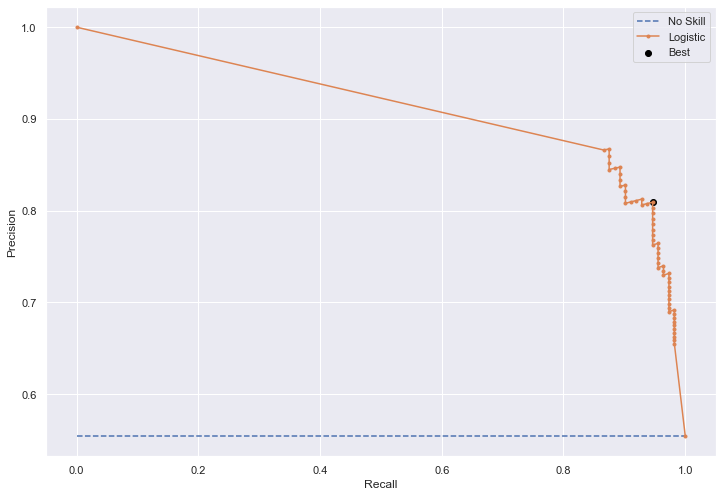

In [284]:
#create ROC precision recall curve
yhat = model2.predict(X_test)


precision, recall, thresholds = precision_recall_curve(y_test, yhat)
fscore = (2 * precision * recall) / (precision + recall)
ix = argmax(fscore)


no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.show()



In [322]:
#run model 2 using 0.00 threshold
predicted = (model2.predict(X_train) >= 0.00)

confmatrix = confusion_matrix(y_train, predicted)
acc = accuracy_score(y_train, predicted)
rec = recall_score(y_train, predicted)
pre = precision_score(y_train, predicted)

print('Model Confusion Matrix:', confmatrix)
print('Model Accuracy:', acc)
print('Model Recall:', rec)
print('Model Precision:', pre)

Model Confusion Matrix: [[  0 320]
 [  0 396]]
Model Accuracy: 0.553072625698324
Model Recall: 1.0
Model Precision: 0.553072625698324


In [319]:
#check with test data
predicted = (model.predict(X_test) >= 0.00)

confmatrix2 = confusion_matrix(y_test, predicted)
acc2 = accuracy_score(y_test, predicted)
rec2 = recall_score(y_test, predicted)
pre2 = precision_score(y_test, predicted)

print('Model Confusion Matrix:', confmatrix2)
print('Model Accuracy:', acc2)
print('Model Recall:', rec2)
print('Model Precision:', pre2)

Model Confusion Matrix: [[  0  90]
 [  0 112]]
Model Accuracy: 0.5544554455445545
Model Recall: 1.0
Model Precision: 0.5544554455445545


#### From this we can see the 100% recall is achieveable but I believe the reduction in accuracy and precision is not worth the 5% increase in recall therefore I would recommend going with model 2 with a threshold of 0.5 and continue to collect data to improve this model. 